# Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
#import modin.pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,1,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,2,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,2,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,1,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,2020,11


In [3]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
list(X['Selected_variables'])

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[list(X['Selected_variables'])]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
features_f

Index(['categoria', 'ingreso_final', 'mediana_nom3',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'cupo_total_tc', 'saldo_no_rot_mdo', 'mediana_pen3', 'gasto_familiar'],
      dtype='object')

In [7]:
df[features_o].describe(include='all').T

,count,unique,top,freq
profesion,9527193,79,OTROS,3561488
nivel_academico,9527193,6,UNIVERSITARIO,5755845
ocupacion,9527193,10,Empleado,7158608
estado_civil,9527193,5,SOLTERO,4609348
rep_calif_cred,9527193,8,A,2693172
genero,9527193,2,F,4941539
ciudad_residencia,9527193,803,PEDRAZA,2634338


# One-Hot Encoding

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.80)
df = X_train
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
2978858,1.0,2.938897e+06,2188897.0,EDUCACION,ESPECIALIZACION,Empleado,6,CASADO,G,F,...,5,202001,1,8700000.0,1,44000.0,0.0,PUERRES,51,630368.99
4715911,1.0,1.305788e+06,1333230.0,OTROS,TECNOLOGO,Empleado,6,CASADO,A,F,...,3,202007,1,9600000.0,7,169000.0,0.0,BUESACO,28,306113.00
4411057,2.0,1.687569e+07,0.0,OTROS,TECNOLOGO,Empleado,6,CASADO,G,F,...,0,202005,0,0.0,5,145000.0,0.0,EL PLAN,36,0.00
4204509,1.0,1.175276e+06,2248369.0,SECRETARIADO,NINGUNO,Empleado,6,CASADO,D,F,...,10,201903,0,0.0,3,79348000.0,0.0,LORICA,59,94893.00
1990035,1.0,1.969222e+06,0.0,CONTADURIA,UNIVERSITARIO,Otro,7,CASADO,E,M,...,2,202010,0,0.0,10,0.0,1241022.0,GUADALAJARA DE BUGA,68,1391704.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421300,1.0,3.156020e+06,4951700.0,INGENIRIA QUIMICA,UNIVERSITARIO,Empleado,6,UNION LIBRE,H,M,...,2,201907,1,2500.0,7,16984000.0,0.0,PUERRES,53,93468.00
3460612,1.0,3.219000e+06,0.0,TECNOLOGIA INDUSTRIAL,TECNOLOGO,Empleado,6,UNION LIBRE,B,M,...,1,202010,0,0.0,10,500000.0,0.0,GUASCA,56,644193.00
8593492,2.0,4.200000e+06,700000.0,ADMINISTRACION,UNIVERSITARIO,Otro,7,SOLTERO,B,F,...,1,202001,1,0.0,1,0.0,0.0,PEDRAZA,30,387620.00
7667950,1.0,1.165110e+06,1166296.0,OTROS,TECNOLOGO,Empleado,6,UNION LIBRE,B,F,...,2,201909,0,0.0,9,10220000.0,0.0,ALVARADO,59,541427.00


In [9]:
df_onehot = pd.get_dummies(df, columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [10]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
2978858,1.0,2.938897e+06,2188897.0,6,1,1,2,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4715911,1.0,1.305788e+06,1333230.0,6,1,1,8,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4411057,2.0,1.687569e+07,0.0,6,1,1,2,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4204509,1.0,1.175276e+06,2248369.0,6,1,1,3,1,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1990035,1.0,1.969222e+06,0.0,7,1,1,4,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421300,1.0,3.156020e+06,4951700.0,6,1,1,1,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3460612,1.0,3.219000e+06,0.0,6,1,1,7,2,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8593492,2.0,4.200000e+06,700000.0,7,1,1,7,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7667950,1.0,1.165110e+06,1166296.0,6,1,1,7,1,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_onehot.shape

(1905438, 896)

# PCA - _Principal Component Analysis_

## Standardization

In [12]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1905438.0,0.0,1.0,-2.23,-0.74,-0.74,0.76,5.23
1,1905438.0,0.0,1.0,-0.67,-0.40,-0.23,0.07,216.18
2,1905438.0,0.0,1.0,-0.49,-0.49,-0.49,0.24,198.59
3,1905438.0,0.0,1.0,-3.04,0.13,0.13,0.13,2.66
4,1905438.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
891,1905438.0,0.0,1.0,-0.01,-0.01,-0.01,-0.01,114.63
892,1905438.0,0.0,1.0,-0.01,-0.01,-0.01,-0.01,111.96
893,1905438.0,-0.0,1.0,-0.00,-0.00,-0.00,-0.00,265.65
894,1905438.0,-0.0,1.0,-0.01,-0.01,-0.01,-0.01,195.21


In [13]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [14]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False, ignore_index = True)
PCA['Participacion'] = PCA['Autovalor']/PCA['Autovalor'].sum()*100
PCA['Acumulado'] = PCA['Participacion'].cumsum()
PCA.head(50)

,Variable,Autovalor,Participacion,Acumulado
0,categoria,8.350604e+06,0.490214,0.490214
1,ingreso_final,6.357918e+06,0.373235,0.863449
2,mediana_nom3,5.810249e+06,0.341085,1.204534
3,ocupacion_tag_gasto_familiar,4.915614e+06,0.288566,1.493100
4,cartera_castigada,4.817692e+06,0.282818,1.775918
5,ind_mora_vigente,4.217142e+06,0.247563,2.023481
6,rep_calif_cred_tag_gasto_familiar,3.638736e+06,0.213608,2.237089
7,genero_tag,3.437141e+06,0.201774,2.438863
8,estado_civil_tag_gasto_familiar,3.335220e+06,0.195791,2.634654
9,profesion_tag_gasto_familiar,3.213720e+06,0.188658,2.823312


Text(0.5, 1.0, 'Componentes Principales Alomarrano')

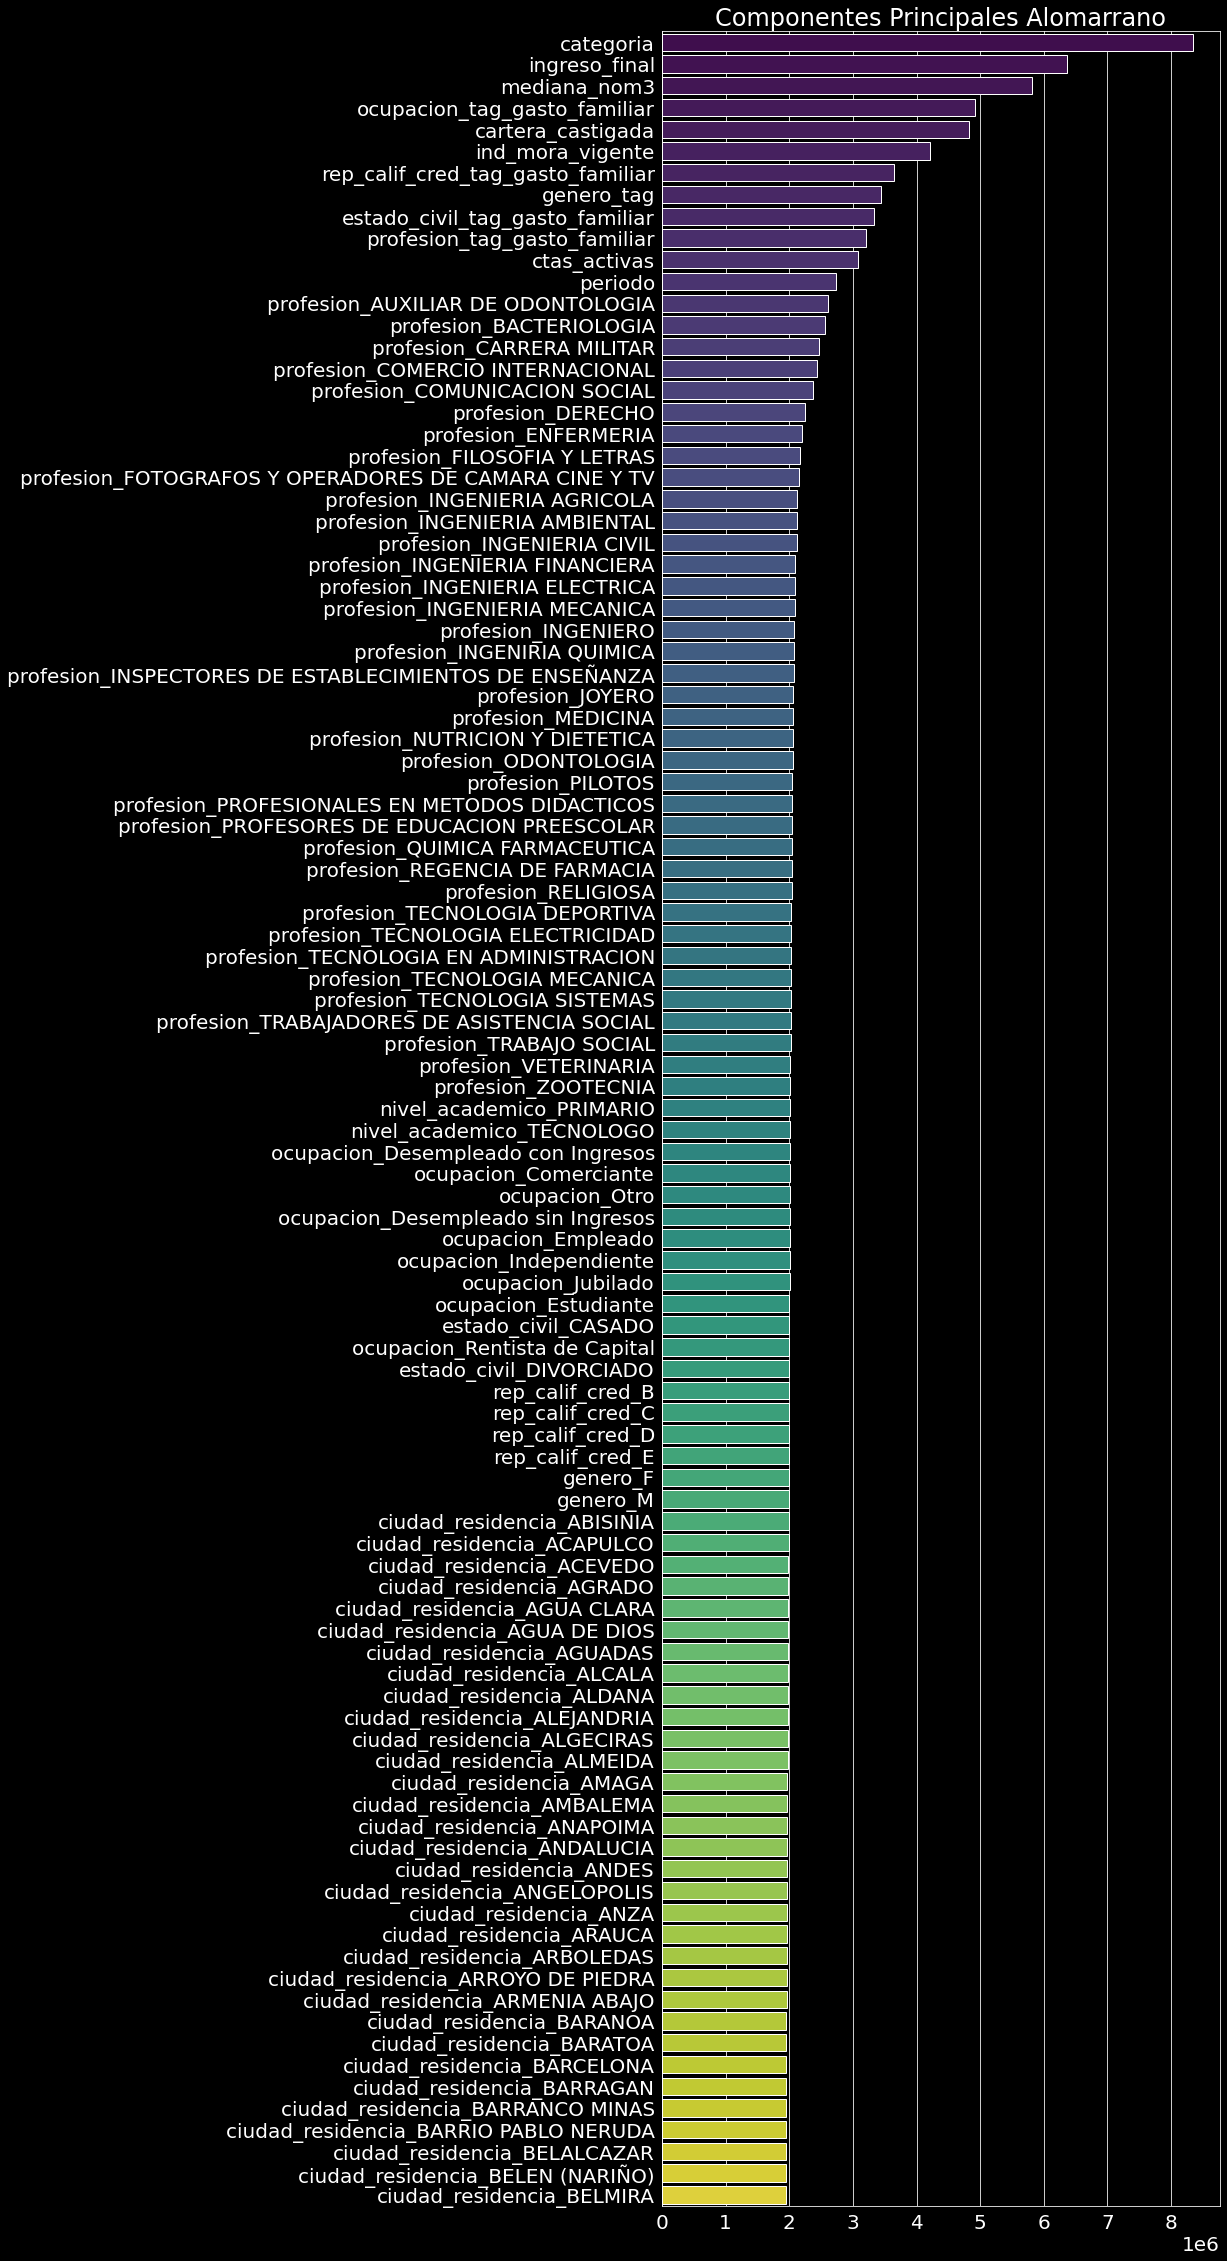

In [18]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Componentes Principales Alomarrano")

Text(0.5, 1.0, 'Componentes Principales Data Alomarrano')

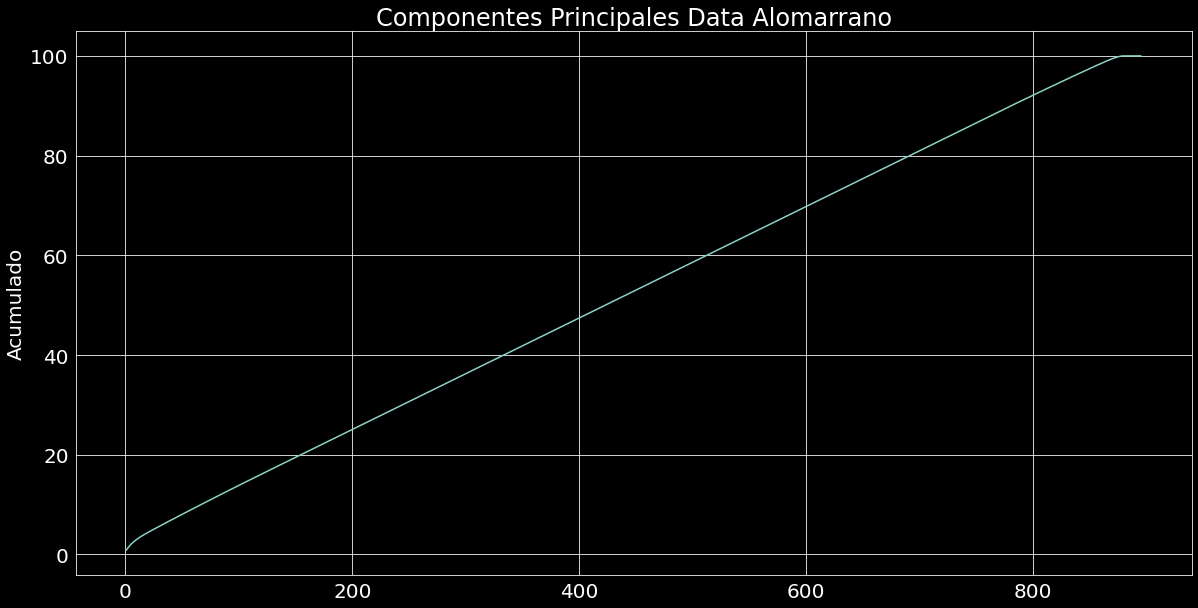

In [19]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
y = PCA.loc[1:PCA.shape[0],'Acumulado']
x = range(1,PCA.shape[0])
sns.lineplot(x=x, y=y, palette="69d")
plt.title("Componentes Principales Data Alomarrano")

In [17]:
PCA.to_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables.csv", index=False)